In [1]:
import pandas as pd

# Путь к файлу Excel
file_path = 'Тест Excel_обновление.xlsx'

# <span style="color: orange;">Лист "Данные"</span>

In [2]:
# Загрузка данных из первой вкладки
data = pd.read_excel(file_path, sheet_name='данные')

# Задание 1. В табл.1 разбейте адрес на составляющие(индекс, страна, ..)

In [3]:
# Создание датафрейма с данными таблицы 1
table_1_data = data.iloc[7:3035, 0:13].rename(columns = data.iloc[6, 0:13])
table_1_data.head()

,Регион,Клиент,Адрес,сумма продаж,статус,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2 МПЗ ОАО,"119530, Россия, Москва г, Очаковское ш, д 16",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,3+3 фирма ООО,"127254, Россия, Москва г, Руставели ул, д 3, к 2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,449 плюс СК ООО,"129338, Россия, Москва г, Вешних Вод ул, д 8, к 2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,777 ТД ООО,"141506, Россия, Московская обл, Солнечногорски...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,7-я ООО,"111672, Россия, Москва г, Салтыковская ул, д 45",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
table_1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 7 to 3033
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Регион        0 non-null      object 
 1   Клиент        3027 non-null   object 
 2   Адрес         3026 non-null   object 
 3   сумма продаж  0 non-null      object 
 4   статус        0 non-null      object 
 5   nan           0 non-null      float64
 6   nan           0 non-null      float64
 7   nan           0 non-null      float64
 8   nan           0 non-null      float64
 9   nan           0 non-null      float64
 10  nan           0 non-null      float64
 11  nan           0 non-null      float64
 12  nan           0 non-null      float64
dtypes: float64(8), object(5)
memory usage: 307.6+ KB


In [5]:
table_1_data = table_1_data.loc[:, table_1_data.columns.notna()]
pd.set_option('display.max_colwidth', None) # Коррекция отображения таблицы
table_1_data.sample(5)

,Регион,Клиент,Адрес,сумма продаж,статус
599,NaN,Гарос ООО,"105275, Россия, Москва г, Буденного пр-кт, д 39, к 1",NaN,NaN
2387,NaN,Тонкушин,"620026, Россия, Свердловская обл, Екатеринбург г, Декабристов ул, д 15",NaN,NaN
2009,NaN,Ролдугин К.В. ИП,"141707, Россия, Московская обл, Долгопрудный г, Октябрьская ул, д 29",NaN,NaN
2094,NaN,Сантел ООО,"117042, Россия, Москва г, Южнобутовская ул, д 23",NaN,NaN
2673,NaN,Шумихина О.Н. ИП,"620072, Россия, Свердловская обл, Екатеринбург г, Высоцкого ул, д 12б",NaN,NaN


In [6]:
import warnings
warnings.filterwarnings('ignore')

component_types = ['Индекс', 'Страна', 'Район', 'Область/Город/Поселок', 'Улица', 'Дом', 'Корпус', 'Дополнительно']
for component_type in component_types:
    table_1_data[component_type] = None

In [7]:
table_1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 7 to 3033
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Регион                 0 non-null      object
 1   Клиент                 3027 non-null   object
 2   Адрес                  3026 non-null   object
 3   сумма продаж           0 non-null      object
 4   статус                 0 non-null      object
 5   Индекс                 0 non-null      object
 6   Страна                 0 non-null      object
 7   Район                  0 non-null      object
 8   Область/Город/Поселок  0 non-null      object
 9   Улица                  0 non-null      object
 10  Дом                    0 non-null      object
 11  Корпус                 0 non-null      object
 12  Дополнительно          0 non-null      object
dtypes: object(13)
memory usage: 307.6+ KB


In [8]:
import re

def classify_address_component(component):
    patterns = {
        'Индекс': r'^\d{5,6}$',
        'Страна': r'^[А-Я][а-я]+$',
        'Область/Город/Поселок': r'.*\s(обл|край|АО|г|городок|п\.?|пгт|с|д)$',
        'Район' : r'.*(р-н|мкр|тер)$',
        'Дом': r'^д\s.*',
        'Улица': r'.*(ш|проезд|ул\.?|аллея|пр-кт|б-р|пер|наб|пл|линия)$',
        'Корпус': r'^(к\s|корп).*',
    }

    for key, pattern in patterns.items():
        if re.search(pattern, component, re.IGNORECASE):
            return key
    return 'Дополнительно'

In [9]:
address_components = table_1_data['Адрес'].str.split(',')
                
for i in range(len(address_components)):
    if isinstance(address_components.iloc[i], list):
        
        for component in address_components.iloc[i]:
            component = component.strip()
            if component != '':
                component_type = classify_address_component(component)

                current_value = table_1_data.at[7+i, component_type]
                if pd.isna(current_value):
                    table_1_data.at[7+i, component_type] = component
                else:
                    table_1_data.at[7+i, component_type] = f"{current_value}, {component}"


In [10]:
table_1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 7 to 3033
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Регион                 0 non-null      object
 1   Клиент                 3027 non-null   object
 2   Адрес                  3026 non-null   object
 3   сумма продаж           0 non-null      object
 4   статус                 0 non-null      object
 5   Индекс                 2980 non-null   object
 6   Страна                 3026 non-null   object
 7   Район                  804 non-null    object
 8   Область/Город/Поселок  3026 non-null   object
 9   Улица                  2769 non-null   object
 10  Дом                    2817 non-null   object
 11  Корпус                 481 non-null    object
 12  Дополнительно          105 non-null    object
dtypes: object(13)
memory usage: 307.6+ KB


In [11]:
table_1_data.sample()

,Регион,Клиент,Адрес,сумма продаж,статус,Индекс,Страна,Район,Область/Город/Поселок,Улица,Дом,Корпус,Дополнительно
2235,NaN,Соловьев В.А. ИП,", Россия, Москва г, Новочеркасский б-р, д вл.5",NaN,NaN,None,Россия,None,Москва г,Новочеркасский б-р,д вл.5,None,None


# Заданиe 2. Присвоить регион в зависимости от города/области из табл.2. если адреса нет-прописать "Нет адреса" (использовать формулу)

In [12]:
# Создание датафрейма с данными таблицы 2
table_2_data = data.iloc[7:13, 15:16].rename(columns = data.iloc[6, 15:16])
table_2_data

,Регион
7,Москва г
8,Московская обл
9,Новосибирская обл
10,Пермский край
11,Свердловская обл
12,Ханты-Мансийский Автономный округ - Югра АО


In [13]:
def assign_region(row):
    address = row['Область/Город/Поселок']
    if pd.isna(address):
        return 'Нет адреса'
    for city in table_2_data.iloc[0:6].values: 
        if city[0].strip() in address:
            return city[0]
    return 'Нет адреса'

table_1_data['Регион'] = table_1_data.apply(assign_region, axis=1)
table_1_data.sample()

,Регион,Клиент,Адрес,сумма продаж,статус,Индекс,Страна,Район,Область/Город/Поселок,Улица,Дом,Корпус,Дополнительно
353,Московская обл,Бокарева Т.С. ИП,"140108, Россия, Московская обл, Раменский р-н, Раменское г, Михалевича ул, д 56",NaN,NaN,140108,Россия,Раменский р-н,"Московская обл, Раменское г",Михалевича ул,д 56,None,None


# Задание 3. В табл. 1 в столбец D проставить суммы продаж по табл.3 за Июль 2011 года по рыбе(использовать формулу)

In [14]:
# Создание датафрейма с данными таблицы 3
table_3_data = data.iloc[7:3035, 17:23].rename(columns = data.iloc[6, 17:23])
table_3_data

,Клиент,Адрес,Продукт,Год,Месяц,сумма прдаж
7,2 МПЗ ОАО,"119530, Россия, Москва г, Очаковское ш, д 16",птица,2011,Июль,-0.0
8,3+3 фирма ООО,"127254, Россия, Москва г, Руставели ул, д 3, к 2",птица,2011,Ноябрь,-0.0
9,449 плюс СК ООО,"129338, Россия, Москва г, Вешних Вод ул, д 8, к 2",птица,2012,Октябрь,-0.0
10,777 ТД ООО,"141506, Россия, Московская обл, Солнечногорский р-н, Солнечногорск г, Дзержинского ул, д 18",птица,2011,Май,-0.0
11,7-я ООО,"111672, Россия, Москва г, Салтыковская ул, д 45",птица,2012,Октябрь,-0.0
...,...,...,...,...,...,...
3029,ЭсСиДжи ЗАО,"123007, Россия, Москва г, Силикатный 1-й проезд, д 13",птица,2011,Март,1022.4
3030,Ювента ООО,"123007, Россия, Москва г, Хорошевский 2-й проезд, д 7",рыба,2011,Ноябрь,1024.38
3031,Юджин ООО,"123458, Россия, Москва г, Таллинская ул, д 7",рыба,2011,Июль,1024.92
3032,Юсифов А.Ш. ИП,"109542, Россия, Москва г, Рязанский пр-кт, д 80, к 1",птица,2012,Июль,1025


In [15]:
# Фильтрация данных по условиям "рыба" и "Июль 2011"
filtered_data = table_3_data[(table_3_data['Продукт'] == 'рыба') & (table_3_data['Год'] == '2011') & (table_3_data['Месяц'] == 'Июль')]

table_1_data['сумма продаж'] = filtered_data['сумма прдаж']
table_1_data.sample()

,Регион,Клиент,Адрес,сумма продаж,статус,Индекс,Страна,Район,Область/Город/Поселок,Улица,Дом,Корпус,Дополнительно
2647,Московская обл,Шелков А.М. ИП,"143362, Россия, Московская обл, Наро-Фоминский р-н, Апрелевка г, Буденного ул, д 22",NaN,NaN,143362,Россия,Наро-Фоминский р-н,"Московская обл, Апрелевка г",Буденного ул,д 22,None,None


# Задание 4. В столбце E проставить статус суммы продаж в соотвествии с табл.4

In [16]:
# Создание датафрейма с данными таблицы 4
table_4_data = data.iloc[1:4, 15:17].rename(columns = data.iloc[0, 15:17])
table_4_data

,Условие,Статус
1,меньше 50 (включительно),А
2,больше 50 и меньше 500 (верняя граница включительно),Б
3,больше 500,В


In [17]:
def assign_status(sales, table):
    if sales <= 50:
        return table['Статус'].iloc[0]
    elif 50 < sales <= 500:
        return table['Статус'].iloc[1]
    elif sales > 500:
        return table['Статус'].iloc[2]

table_1_data['статус'] = table_3_data['сумма прдаж'].apply(lambda sales: assign_status(sales, table_4_data))
table_1_data.sample(5)

,Регион,Клиент,Адрес,сумма продаж,статус,Индекс,Страна,Район,Область/Город/Поселок,Улица,Дом,Корпус,Дополнительно
2669,Свердловская обл,ШТОФ ООО,"620041, Россия, Свердловская обл, Екатеринбург г, Советская ул, д 22, к 1",NaN,В,620041,Россия,None,"Свердловская обл, Екатеринбург г",Советская ул,д 22,к 1,None
2756,Москва г,Юнона ООО,"127560, Россия, Москва г, Плещеева ул, д 11",NaN,В,127560,Россия,None,Москва г,Плещеева ул,д 11,None,None
1597,Москва г,Мясо Хауз ООО,"115230, Россия, Москва г, Электролитный проезд, д 5, к 10",NaN,Б,115230,Россия,None,Москва г,Электролитный проезд,д 5,к 10,None
437,Москва г,Вектор ООО,"109386, Россия, Москва г, Краснодонская ул, д 7, к 1",NaN,Б,109386,Россия,None,Москва г,Краснодонская ул,д 7,к 1,None
231,Москва г,Арт-Трейд 2000 ООО,"123317, Россия, Москва г, Красногвардейский 2-й проезд, д 6/1",NaN,А,123317,Россия,None,Москва г,Красногвардейский 2-й проезд,д 6/1,None,None


# Задание 5. Создать сводную табл. 1 по табл.1  (клиент, адрес) на новом листе, назвать его "СВОД", добавить срез по региону и сумме продаж (выбрать регион Пермский край, статус Б)

In [18]:
# Создаем сводную таблицу по "Клиент" и "Адрес"
pivot_table = table_1_data.pivot_table(
    index=['Клиент', 'Адрес'],
    values=['Регион', 'сумма продаж', 'статус'],
    aggfunc={'Регион': 'first', 'статус': 'first', 'сумма продаж': 'sum'}
).reset_index()

# Фильтрация
pivot_table_filtered = pivot_table[
    (pivot_table['Регион'] == ' Пермский край') & 
    (pivot_table['статус'] == table_4_data['Статус'].iloc[1])
]

pivot_table_filtered

,Клиент,Адрес,Регион,статус,сумма продаж
451,ВСМПО-АВИСМА ОАО,"618426, Россия, Пермский край, Березники г, Загородная ул, д 29",Пермский край,Б,0


# <span style="color: orange;">Лист "Работа с таблицами"</span>

In [19]:
# Загрузка данных из второй вкладки
data_2 = pd.read_excel(file_path, sheet_name='работа с таблицами')

# Задание 1. Подставьте в таблицу 1 названия городов из таблицы 2 в соответствии с кодом города

In [20]:
# Создание датафрейма с данными таблицы 1
table_1_data_2 = data_2.iloc[21:1022, 1:8].rename(columns = data_2.iloc[20, 1:8])
table_1_data_2

,Код города,Название города,Кол-во,Цена,Сумма реализация,Статус,Место по объёму реализации
21,1,NaN,26,93470,2430220,NaN,NaN
22,4,NaN,100,15436,1543600,NaN,NaN
23,4,NaN,84,85030,7142520,NaN,NaN
24,1,NaN,58,17080,990640,NaN,NaN
25,5,NaN,24,64494,1547856,NaN,NaN
...,...,...,...,...,...,...,...
1016,4,NaN,29,21033,609957,NaN,NaN
1017,4,NaN,57,1394,79458,NaN,NaN
1018,2,NaN,8,35388,283104,NaN,NaN
1019,3,NaN,70,26745,1872150,NaN,NaN


In [21]:
# Создание датафрейма с данными таблицы 2
table_2_data_2 = data_2.iloc[3:13, 8:10].rename(columns = data_2.iloc[2, 8:10])
table_2_data_2

,Код города,Название города
3,1,Москва
4,2,Санкт-Петербург
5,3,Челябинск
6,4,Архангельск
7,5,Краснодар
8,6,Владивосток
9,7,Мурманск
10,8,Новосибирск
11,9,Тюмень
12,10,Сочи


In [22]:
# Создаем словарь для замены
city_map = dict(zip(table_2_data_2['Код города'], table_2_data_2['Название города']))

# Подставляем названия городов из table_2_data_2 в столбец "Название города" в table_1_data_2
table_1_data_2['Название города'] = table_1_data_2['Код города'].map(city_map)
table_1_data_2

,Код города,Название города,Кол-во,Цена,Сумма реализация,Статус,Место по объёму реализации
21,1,Москва,26,93470,2430220,NaN,NaN
22,4,Архангельск,100,15436,1543600,NaN,NaN
23,4,Архангельск,84,85030,7142520,NaN,NaN
24,1,Москва,58,17080,990640,NaN,NaN
25,5,Краснодар,24,64494,1547856,NaN,NaN
...,...,...,...,...,...,...,...
1016,4,Архангельск,29,21033,609957,NaN,NaN
1017,4,Архангельск,57,1394,79458,NaN,NaN
1018,2,Санкт-Петербург,8,35388,283104,NaN,NaN
1019,3,Челябинск,70,26745,1872150,NaN,NaN


# Задание 2. Посчитайте общую сумму реализации по каждому городу из таблицы 1 и подставьте значения в таблицу 2

In [23]:
total_sales = table_1_data_2.groupby('Код города')['Сумма реализация'].sum().reset_index().rename(columns = {'Код города' : 'Код города', 'Сумма реализация': 'Сумма'})
table_2_data_2 = table_2_data_2.merge(total_sales, on='Код города', how='left')
table_2_data_2

,Код города,Название города,Сумма
0,1,Москва,240320963
1,2,Санкт-Петербург,224997697
2,3,Челябинск,295786410
3,4,Архангельск,271035716
4,5,Краснодар,264890435
5,6,Владивосток,243156318
6,7,Мурманск,214483982
7,8,Новосибирск,256068049
8,9,Тюмень,269061092
9,10,Сочи,249391138


# Задание 3. Проставьте в таблице 1 статус каждой строки из таблицы 3 в зависимости от суммы реализации

In [24]:
# Создание датафрейма с данными таблицы 3
table_3_data_2 = data_2.iloc[3:6, 12:14].rename(columns = data_2.iloc[2, 12:14])
table_3_data_2

,Условие,Статус
3,больше 5 млн,А
4,от 1 до 5 млн,Б
5,меньше 1 млн,В


In [25]:
def assign_status_2(sales, table):
    if sales > 5000000:
        return table['Статус'].iloc[0]
    elif 1000000 < sales <= 5000000:
        return table['Статус'].iloc[1]
    elif sales <= 1000000:
        return table['Статус'].iloc[2]


table_1_data_2['Статус'] = table_1_data_2['Сумма реализация'].apply(lambda sales: assign_status_2(sales, table_3_data_2))
table_1_data_2

,Код города,Название города,Кол-во,Цена,Сумма реализация,Статус,Место по объёму реализации
21,1,Москва,26,93470,2430220,Б,NaN
22,4,Архангельск,100,15436,1543600,Б,NaN
23,4,Архангельск,84,85030,7142520,А,NaN
24,1,Москва,58,17080,990640,В,NaN
25,5,Краснодар,24,64494,1547856,Б,NaN
...,...,...,...,...,...,...,...
1016,4,Архангельск,29,21033,609957,В,NaN
1017,4,Архангельск,57,1394,79458,В,NaN
1018,2,Санкт-Петербург,8,35388,283104,В,NaN
1019,3,Челябинск,70,26745,1872150,Б,NaN


# Задание 4. Проставить место по объёму реализации для каждой строки в таблице 1(по убыванию объема)

In [26]:
table_1_data_2['Место по объёму реализации'] = table_1_data_2['Сумма реализация'].rank(ascending=False, method='dense').astype(int)
table_1_data_2

,Код города,Название города,Кол-во,Цена,Сумма реализация,Статус,Место по объёму реализации
21,1,Москва,26,93470,2430220,Б,410
22,4,Архангельск,100,15436,1543600,Б,551
23,4,Архангельск,84,85030,7142520,А,54
24,1,Москва,58,17080,990640,В,675
25,5,Краснодар,24,64494,1547856,Б,549
...,...,...,...,...,...,...,...
1016,4,Архангельск,29,21033,609957,В,771
1017,4,Архангельск,57,1394,79458,В,958
1018,2,Санкт-Петербург,8,35388,283104,В,871
1019,3,Челябинск,70,26745,1872150,Б,496


# Задание 5. Найдите города, занявшие первые три места по объёмам реализации(табл.1), используйте формулу

In [27]:
# Создание датафрейма с данными таблицы к заданию 5
table_5_data_2 = data_2.iloc[10:13, 1:3].rename(columns = data_2.iloc[9, 1:3])
table_5_data_2

,место:,город:
10,1,NaN
11,2,NaN
12,3,NaN


In [28]:
top_cities = table_1_data_2[table_1_data_2['Место по объёму реализации'] <= 3].sort_values(by='Место по объёму реализации')
top_cities

,Код города,Название города,Кол-во,Цена,Сумма реализация,Статус,Место по объёму реализации
757,2,Санкт-Петербург,99,97486,9651114,А,1
828,10,Сочи,96,97771,9386016,А,2
995,1,Москва,94,98929,9299326,А,3


In [29]:
table_5_data_2['город:'] = top_cities['Название города'].values
table_5_data_2

,место:,город:
10,1,Санкт-Петербург
11,2,Сочи
12,3,Москва


# Задание 6. Найдите количество Статусов А для городов Челябинск и Мурманск

In [30]:
# Создание датафрейма с данными из таблицы к заданию 6
table_6_data_2 = data_2.iloc[16:18, 1:4]
table_6_data_2

,Unnamed: 1,Unnamed: 2,Unnamed: 3
16,город:,Челябинск,NaN
17,город:,Мурманск,NaN


In [31]:
status_counts = table_1_data_2[table_1_data_2['Название города'].isin(['Челябинск', 'Мурманск']) & 
                               (table_1_data_2['Статус'] == 'А')].groupby('Название города').size().reset_index(name='Количество статусов А')

for index, row in status_counts.iterrows():
    city = row['Название города']
    count = row['Количество статусов А']
    table_6_data_2.loc[table_6_data_2['Unnamed: 2'] == city, 'Unnamed: 3'] = count

table_6_data_2

,Unnamed: 1,Unnamed: 2,Unnamed: 3
16,город:,Челябинск,19
17,город:,Мурманск,13


# Задание 7. Создать диаграмму (гистаграмма линейчатая) по табл. 2 (название города, сумма), добавить подписи данных.

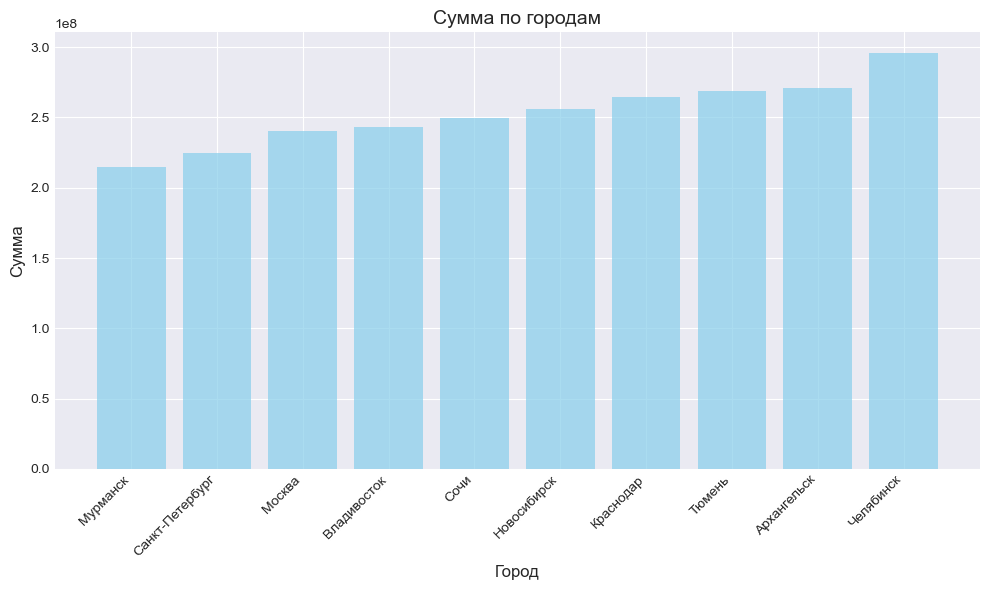

In [32]:
import matplotlib.pyplot as plt

table_2_data_2 = table_2_data_2.sort_values(by = 'Сумма')

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')
plt.bar(table_2_data_2['Название города'], table_2_data_2['Сумма'], color='skyblue', alpha=0.7)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Сумма', fontsize=12)
plt.title('Сумма по городам', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plot.png')
plt.show()

## Сохранение данных в эксель

In [33]:
from openpyxl import load_workbook
from openpyxl.drawing.image import Image


book = load_workbook(file_path)
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    writer.book = book
    table_1_data.to_excel(writer, sheet_name='данные', startrow=7, startcol=0, index=False, header=True)
    pivot_table_filtered.to_excel(writer, sheet_name='СВОД', startrow=0, startcol=0, index=False, header=True)
    table_1_data_2.to_excel(writer, sheet_name='работа с таблицами', startrow=21, startcol=1, index=False, header=True)
    table_2_data_2.to_excel(writer, sheet_name='работа с таблицами', startrow=3, startcol=8, index=False, header=True)
    table_5_data_2.to_excel(writer, sheet_name='работа с таблицами', startrow=10, startcol=1, index=False, header=True)
    table_6_data_2.to_excel(writer, sheet_name='работа с таблицами', startrow=17, startcol=1, index=False, header=False)
   
    img = Image('plot.png')
    sheet = writer.book['работа с таблицами']
    sheet.add_image(img, 'P4')

# Сохранение изменений
book.save(file_path)
